In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.datasets import make_blobs

In [2]:
make_blobs?

In [3]:
X,y=make_blobs(n_samples=1000,n_features=2,center_box=(-3,3),centers=2,random_state=1)

In [4]:
c=np.array([-1,3.0])

In [5]:
np.unique(y,return_counts=True)

(array([0, 1]), array([500, 500]))

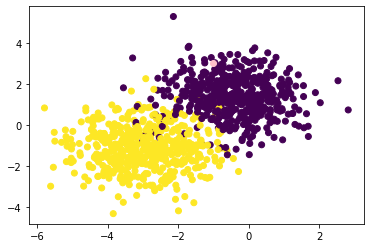

In [6]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.scatter(c[0],c[1],c='pink')
plt.show()

In [7]:
def distance(a,b):
    return np.sqrt(np.sum((a-b)**2))

In [8]:
def KNN(X,y,c,k=5):          #dry run
    m=X.shape[0]
    
    dis_l=[]
    
    for ix in range(m):
        dis=distance(X[ix],c)
        
        dis_l.append([dis,y[ix]])
        
    dis_l=sorted(dis_l)     #sort the list
    dis_l=np.array(dis_l)[:k]   #convert the list into array
    
    uniq=np.unique(dis_l[:,1],return_counts=True)      #find the unique values in the list       
    out=np.argmax(uniq[1])        #find the maximum value in the count list
    
    return int(uniq[0][out])
        

In [10]:
KNN(X,y,c)

0

In [23]:
def accuracy(X_train,y_train,X_test,y_test,k=5):         
    y_pred=[]                  #list for predicted values of your KNN model
    for ix in X_test:
        pred=KNN(X_train,y_train,ix,k)         
        y_pred.append(pred)  #add those predicted values to the list
    score=np.sum(y_test==y_pred)/y_test.shape[0]          #this calculated the accuracy by comparing the testing data values from the dataset and the trained values from the KNN model
    return score
    

In [24]:
data=pd.read_csv("./fashion-mnist_test.csv")


X=data.values[:,1:]   #this means column 1 to the end column and all the rows   
y=data.values[:,0]          #this means all rows and only the column which contains the value of labels

In [25]:
print(X.shape[0])
print(y.shape[0])

10000
10000


In [29]:
split=int(0.70*(X.shape[0]))       #split the dataset in the ratio of 70:30.For example if X=1000 and split_factor=0.7 then split=X*split_factor that is 1000*0.70=700

In [30]:
X_train=X[:split]              #that means 700 values
y_train=y[:split]               #that means 700 values

X_test=X[split:]                  
y_test=y[split:]

In [ ]:
accuracy(X_train,y_train,X_test,y_test)